In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive

drive.mount("/content/drive")
df = pd.read_csv("/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes.csv")


df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-44-e03998c9951a>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985365 entries, 0 to 1985364
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
df.isnull().sum()


CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           617375
ZIP CODE                          617613
LATITUDE                          227063
LONGITUDE                         227063
LOCATION                          227063
ON STREET NAME                    415489
CROSS STREET NAME                 738354
OFF STREET NAME                  1662247
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6164
CONTRIBUTING FACTOR VEHICLE 2     300815
CONTRIBUTING FACTOR VEHICLE 3    1845351
CONTRIBUTING FACTOR VEHICLE 4    1954044
CONTRIBUTING FACTOR VEHICLE 5    1976922
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
# calculate the percentage of null values in each column
null_percentages = df.isnull().sum() / len(df) * 100

# select columns that have more than 50% null values
cols_to_drop = null_percentages[null_percentages > 50].index
df = df.drop(columns=cols_to_drop)
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


In [ ]:
# convert the CRASH DATE column to datetime
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


In [ ]:
# get the number of crashes by CRASH DATE
crashes_by_date = df["CRASH DATE"].value_counts().sort_index()
crashes_by_date.head()


2012-07-01    538
2012-07-02    564
2012-07-03    664
2012-07-04    432
2012-07-05    591
Name: CRASH DATE, dtype: int64

In [ ]:
crashes_by_date.tail()


2023-04-14    236
2023-04-15    195
2023-04-16    178
2023-04-17    193
2023-04-18    178
Name: CRASH DATE, dtype: int64

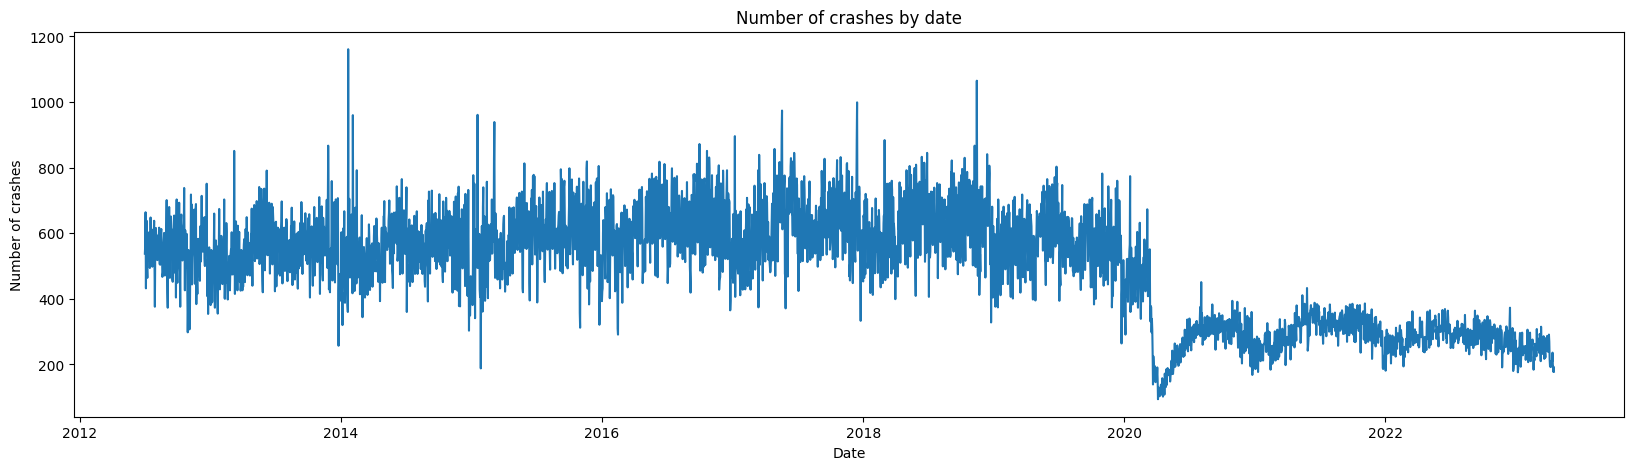

In [ ]:
# plot the number of crashes by CRASH DATE
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(crashes_by_date)
plt.xlabel("Date")
plt.ylabel("Number of crashes")
plt.title("Number of crashes by date")
plt.show()


In [ ]:
# break the dataframe into 2 columns: date and number of crashes
crashes_by_date = pd.DataFrame(crashes_by_date)
crashes_by_date = crashes_by_date.reset_index()
crashes_by_date.columns = ["date", "number_of_crashes"]
crashes_by_date.head(10)


,date,number_of_crashes
0,2012-07-01,538
1,2012-07-02,564
2,2012-07-03,664
3,2012-07-04,432
4,2012-07-05,591
5,2012-07-06,638
6,2012-07-07,490
7,2012-07-08,464
8,2012-07-09,533
9,2012-07-10,524


In [ ]:
crashes_by_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3944 non-null   datetime64[ns]
 1   number_of_crashes  3944 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 61.8 KB


In [ ]:
# take dates only for the last 180 days
crashes_by_date = crashes_by_date[-180:]
crashes_by_date.head()


,date,number_of_crashes
3764,2022-10-21,335
3765,2022-10-22,326
3766,2022-10-23,240
3767,2022-10-24,295
3768,2022-10-25,295


In [ ]:
timesteps = crashes_by_date["date"].to_numpy()
crashes = crashes_by_date["number_of_crashes"].to_numpy()

timesteps[:10], crashes[:10]


(array(['2022-10-21T00:00:00.000000000', '2022-10-22T00:00:00.000000000',
        '2022-10-23T00:00:00.000000000', '2022-10-24T00:00:00.000000000',
        '2022-10-25T00:00:00.000000000', '2022-10-26T00:00:00.000000000',
        '2022-10-27T00:00:00.000000000', '2022-10-28T00:00:00.000000000',
        '2022-10-29T00:00:00.000000000', '2022-10-30T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([335, 326, 240, 295, 295, 265, 315, 301, 307, 290]))

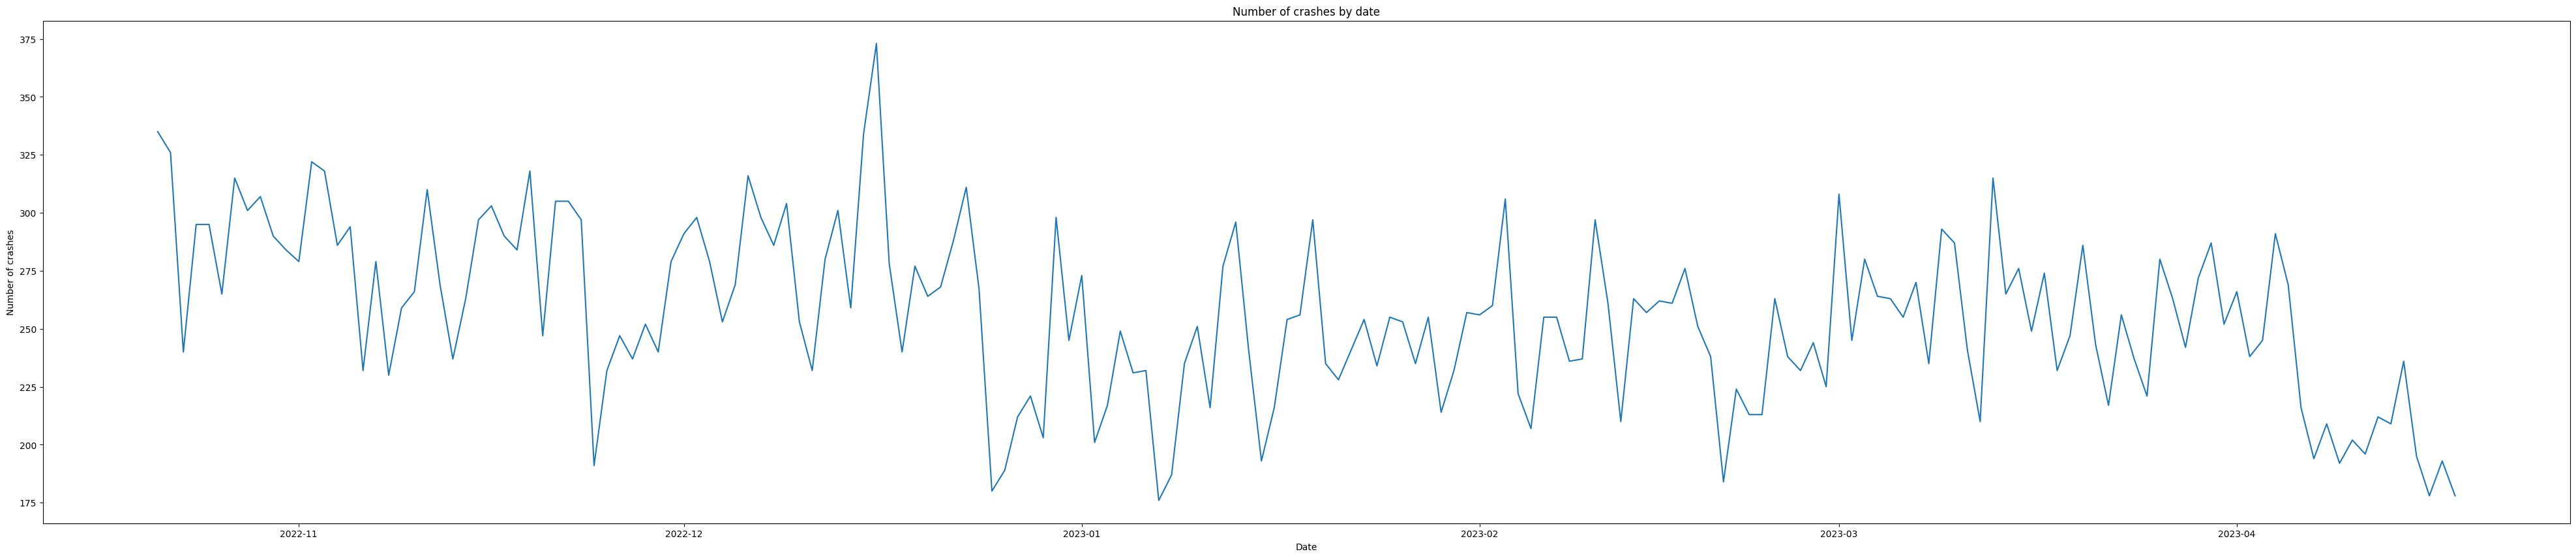

In [ ]:
# plot the number of crashes by CRASH DATE
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.plot(crashes_by_date["date"], crashes_by_date["number_of_crashes"])
plt.xlabel("Date")
plt.ylabel("Number of crashes")
plt.title("Number of crashes by date")
plt.show()


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(crashes_by_date["number_of_crashes"]))  # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = (
    crashes_by_date["date"][:split_size],
    crashes_by_date["number_of_crashes"][:split_size],
)

# Create test data splits (everything after the split)
X_test, y_test = (
    crashes_by_date["date"][split_size:],
    crashes_by_date["number_of_crashes"][split_size:],
)

len(X_train), len(X_test), len(y_train), len(y_test)


(144, 36, 144, 36)

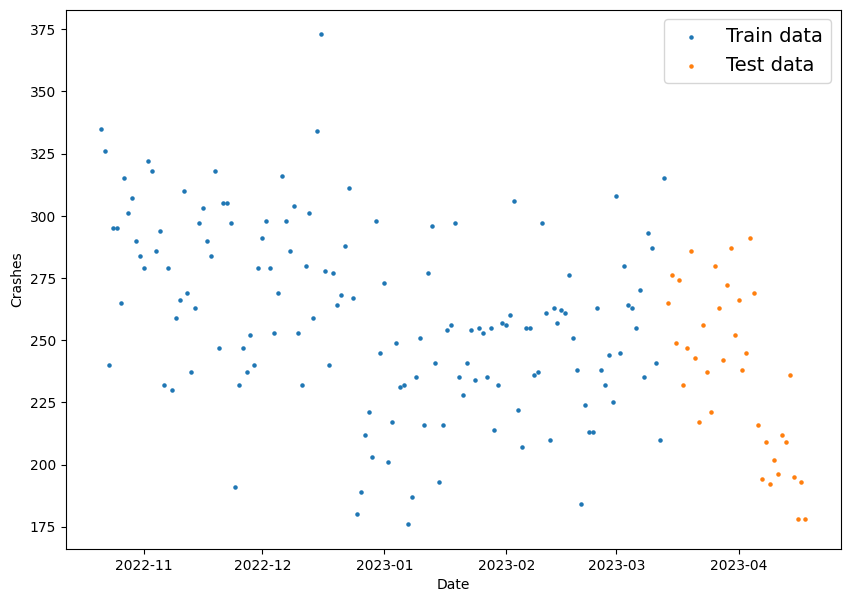

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Crashes")
plt.legend(fontsize=14)
plt.show()


In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Crashes")
    if label:
        plt.legend(fontsize=14)  # make label bigger
    plt.grid(True)


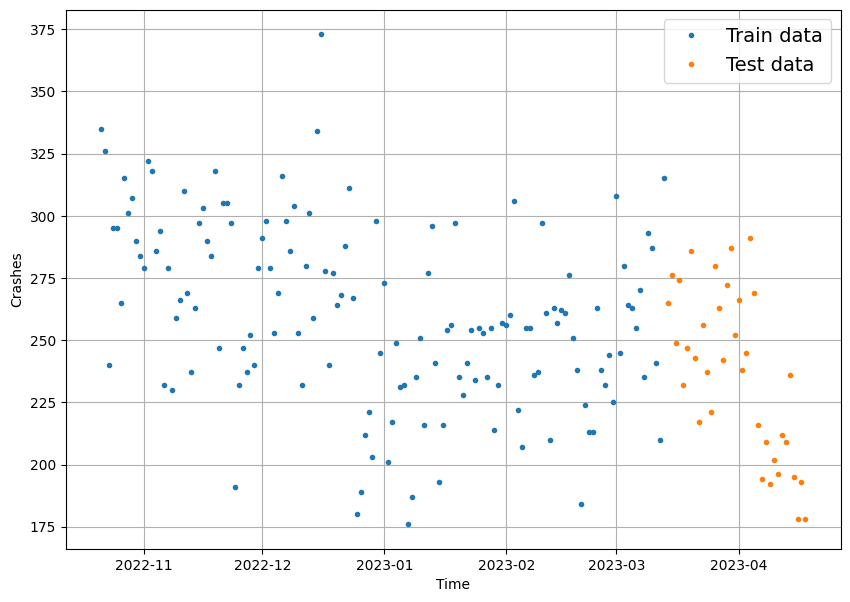

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")


In [ ]:
# Create a naïve forecast
naive_forecast = y_test[
    :-1
]  # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]  # View frist 10 and last 10


(3908    265
 3909    276
 3910    249
 3911    274
 3912    232
 3913    247
 3914    286
 3915    243
 3916    217
 3917    256
 Name: number_of_crashes, dtype: int64,
 3933    209
 3934    192
 3935    202
 3936    196
 3937    212
 3938    209
 3939    236
 3940    195
 3941    178
 3942    193
 Name: number_of_crashes, dtype: int64)

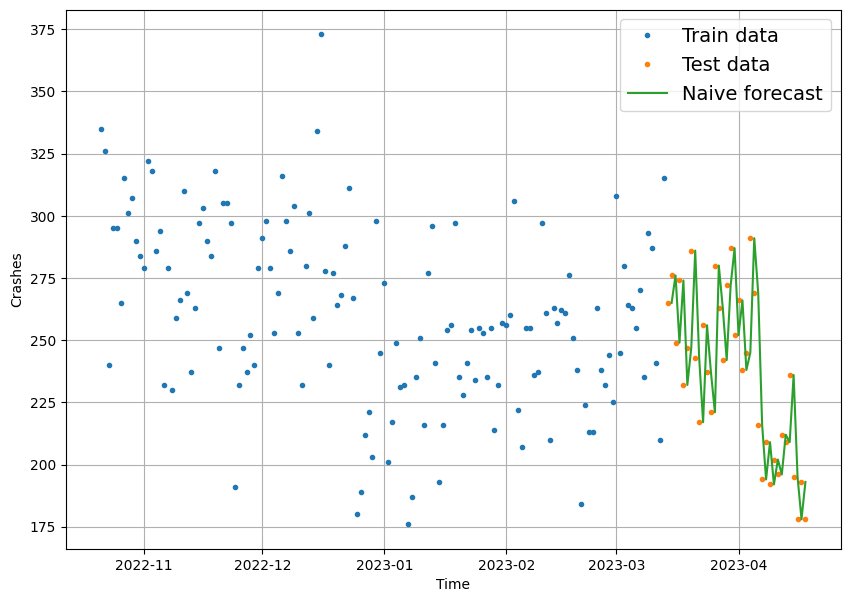

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(
    timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast"
)


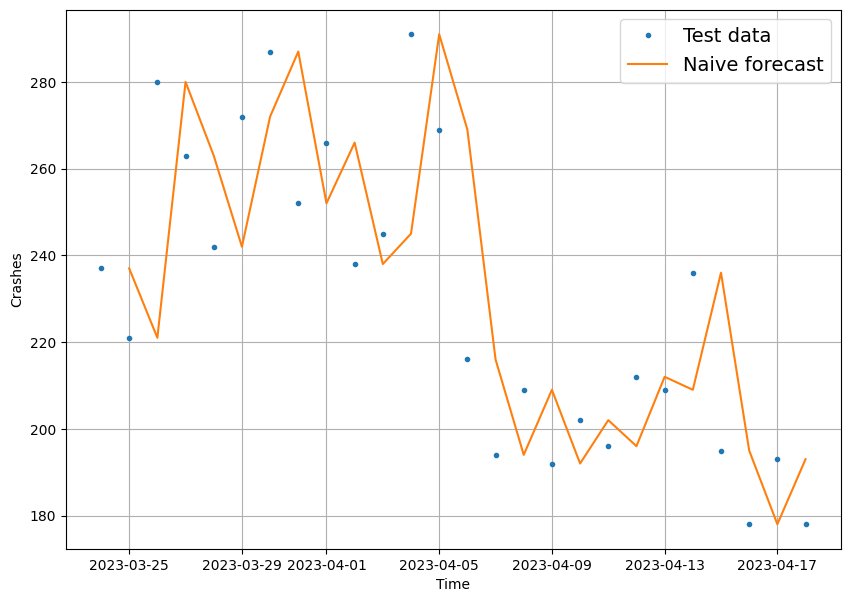

In [ ]:
plt.figure(figsize=(10, 7))
offset = 10  # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(
    timesteps=X_test[1:],
    values=naive_forecast,
    format="-",
    start=offset,
    label="Naive forecast",
)


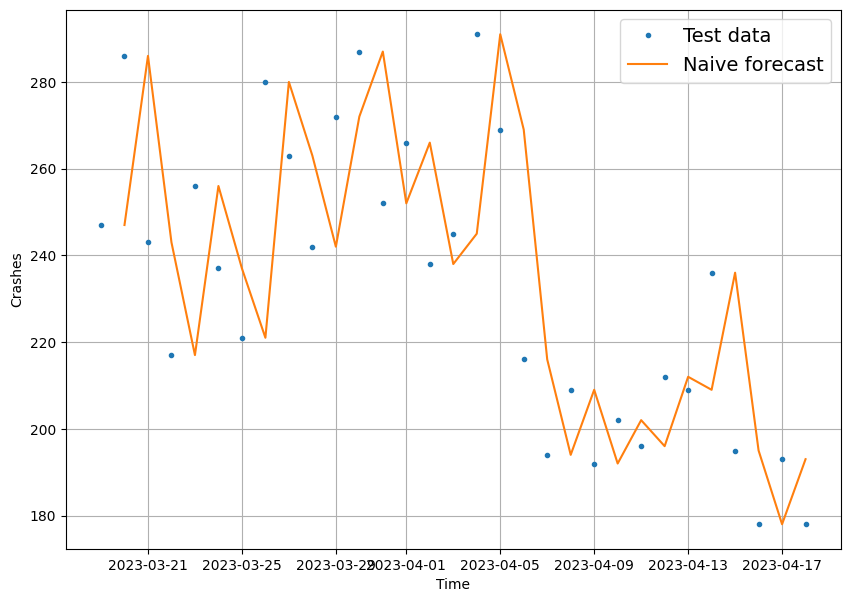

In [ ]:
plt.figure(figsize=(10, 7))
offset = 5  # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(
    timesteps=X_test[1:],
    values=naive_forecast,
    format="-",
    start=offset,
    label="Naive forecast",
)


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    """
    Creates labels for windowed dataset.

    E.g. if horizon=1 (default)
    Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
    """
    return x[:, :-horizon], x[:, -horizon:]


In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras import layers


In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(
    tf.expand_dims(tf.range(8) + 1, axis=0), horizon=HORIZON
)
print(
    f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}"
)


Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    window_indexes = (
        window_step
        + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    )  # create 2D array of windows of size window_size

    windowed_array = x[window_indexes]

    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels


In [ ]:
full_windows, full_labels = make_windows(
    crashes, window_size=WINDOW_SIZE, horizon=HORIZON
)
len(full_windows), len(full_labels)


(173, 173)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")


Window: [335 326 240 295 295 265 315] -> Label: [301]
Window: [326 240 295 295 265 315 301] -> Label: [307]
Window: [240 295 295 265 315 301 307] -> Label: [290]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")


Window: [192 202 196 212 209 236 195] -> Label: [178]
Window: [202 196 212 209 236 195 178] -> Label: [193]
Window: [196 212 209 236 195 178 193] -> Label: [178]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(
        len(windows) * (1 - test_split)
    )  # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(138, 35, 138, 35)

In [ ]:
train_windows[:5], train_labels[:5]


(array([[335, 326, 240, 295, 295, 265, 315],
        [326, 240, 295, 295, 265, 315, 301],
        [240, 295, 295, 265, 315, 301, 307],
        [295, 295, 265, 315, 301, 307, 290],
        [295, 265, 315, 301, 307, 290, 284]]),
 array([[301],
        [307],
        [290],
        [284],
        [279]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[: -HORIZON - 1]), y_train[WINDOW_SIZE:])


False

In [ ]:
import os


# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),  # create filepath to save model
        verbose=0,  # only output a limited amount of text
        save_best_only=True,
    )  # save only the best model to file


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(
            HORIZON, activation="linear"
        ),  # linear activation is the same as having no activation
    ],
    name="model_1_dense",
)  # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# Fit model
model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)],
)  # create ModelCheckpoint callback to save best model


Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 347.9453 - mae: 347.9453

2/2 [==============================] - 2s 882ms/step - loss: 346.0680 - mae: 346.0680 - val_loss: 287.5682 - val_mae: 287.5682
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 314.6906 - mae: 314.6906

2/2 [==============================] - 1s 535ms/step - loss: 313.6885 - mae: 313.6885 - val_loss: 256.8772 - val_mae: 256.8772
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 281.8047 - mae: 281.8047

2/2 [==============================] - 1s 794ms/step - loss: 281.0107 - mae: 281.0107 - val_loss: 225.8461 - val_mae: 225.8461
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 249.3861 - mae: 249.3861

2/2 [==============================] - 1s 788ms/step - loss: 247.9945 - mae: 247.9945 - val_loss: 194.6092 - val_mae: 194.6092
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 215.0502 - mae: 215.0502

2/2 [==============================] - 1s 777ms/step - loss: 214.7807 - mae: 214.7807 - val_loss: 163.2795 - val_mae: 163.2795
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 181.4731 - mae: 181.4731

2/2 [==============================] - 1s 779ms/step - loss: 181.3893 - mae: 181.3893 - val_loss: 131.7272 - val_mae: 131.7272
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 148.2013 - mae: 148.2013

2/2 [==============================] - 1s 783ms/step - loss: 147.8826 - mae: 147.8826 - val_loss: 100.0155 - val_mae: 100.0155
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 116.0398 - mae: 116.0398

2/2 [==============================] - 1s 646ms/step - loss: 114.1905 - mae: 114.1905 - val_loss: 68.0146 - val_mae: 68.0146
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 81.6959 - mae: 81.6959

2/2 [==============================] - 1s 550ms/step - loss: 80.8888 - mae: 80.8888 - val_loss: 38.1253 - val_mae: 38.1253
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 50.9932 - mae: 50.9932

2/2 [==============================] - 1s 772ms/step - loss: 50.4260 - mae: 50.4260 - val_loss: 22.6822 - val_mae: 22.6822
Epoch 11/100
2/2 [==============================] - 0s 33ms/step - loss: 29.3968 - mae: 29.3968 - val_loss: 30.1237 - val_mae: 30.1237
Epoch 12/100
2/2 [==============================] - 0s 32ms/step - loss: 30.5882 - mae: 30.5882 - val_loss: 44.0681 - val_mae: 44.0681
Epoch 13/100
2/2 [==============================] - 0s 33ms/step - loss: 42.4085 - mae: 42.4085 - val_loss: 52.5659 - val_mae: 52.5659
Epoch 14/100
2/2 [==============================] - 0s 30ms/step - loss: 49.4400 - mae: 49.4400 - val_loss: 53.1207 - val_mae: 53.1207
Epoch 15/100
2/2 [==============================] - 0s 48ms/step - loss: 49.6956 - mae: 49.6956 - val_loss: 47.3320 - val_mae: 47.3320
Epoch 16/100
2/2 [==============================] - 0s 30ms/step - loss: 44.6001 - mae: 44.6001 - val_loss: 38.2547 - val_mae: 38.2547
Epoch 17/100
2/2 [==============================] - 0s 30ms/step - 

2/2 [==============================] - 1s 523ms/step - loss: 27.2584 - mae: 27.2584 - val_loss: 22.3807 - val_mae: 22.3807
Epoch 20/100
2/2 [==============================] - 0s 32ms/step - loss: 28.9789 - mae: 28.9789 - val_loss: 23.5939 - val_mae: 23.5939
Epoch 21/100
2/2 [==============================] - 0s 31ms/step - loss: 31.7897 - mae: 31.7897 - val_loss: 24.1675 - val_mae: 24.1675
Epoch 22/100
2/2 [==============================] - 0s 35ms/step - loss: 32.5108 - mae: 32.5108 - val_loss: 23.2077 - val_mae: 23.2077
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 31.8564 - mae: 31.8564

2/2 [==============================] - 1s 511ms/step - loss: 30.9862 - mae: 30.9862 - val_loss: 22.2509 - val_mae: 22.2509
Epoch 24/100
2/2 [==============================] - 0s 31ms/step - loss: 28.5043 - mae: 28.5043 - val_loss: 22.7316 - val_mae: 22.7316
Epoch 25/100
2/2 [==============================] - 0s 32ms/step - loss: 27.0738 - mae: 27.0738 - val_loss: 24.2298 - val_mae: 24.2298
Epoch 26/100
2/2 [==============================] - 0s 36ms/step - loss: 27.1657 - mae: 27.1657 - val_loss: 27.3611 - val_mae: 27.3611
Epoch 27/100
2/2 [==============================] - 0s 29ms/step - loss: 28.3475 - mae: 28.3475 - val_loss: 29.1424 - val_mae: 29.1424
Epoch 28/100
2/2 [==============================] - 0s 47ms/step - loss: 29.2137 - mae: 29.2137 - val_loss: 28.4660 - val_mae: 28.4660
Epoch 29/100
2/2 [==============================] - 0s 49ms/step - loss: 28.7852 - mae: 28.7852 - val_loss: 26.3956 - val_mae: 26.3956
Epoch 30/100
2/2 [==============================] - 0s 32ms/step - 

2/2 [==============================] - 1s 534ms/step - loss: 25.7332 - mae: 25.7332 - val_loss: 21.9053 - val_mae: 21.9053
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 26.9641 - mae: 26.9641

2/2 [==============================] - 1s 526ms/step - loss: 26.2950 - mae: 26.2950 - val_loss: 21.5589 - val_mae: 21.5589
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 27.7221 - mae: 27.7221

2/2 [==============================] - 1s 533ms/step - loss: 27.1504 - mae: 27.1504 - val_loss: 21.5269 - val_mae: 21.5269
Epoch 63/100
1/2 [==============>...............] - ETA: 0s - loss: 26.9849 - mae: 26.9849

2/2 [==============================] - 1s 550ms/step - loss: 27.5342 - mae: 27.5342 - val_loss: 21.5098 - val_mae: 21.5098
Epoch 64/100
2/2 [==============================] - 0s 29ms/step - loss: 27.0997 - mae: 27.0997 - val_loss: 21.6746 - val_mae: 21.6746
Epoch 65/100
2/2 [==============================] - 0s 32ms/step - loss: 26.5295 - mae: 26.5295 - val_loss: 21.8425 - val_mae: 21.8425
Epoch 66/100
2/2 [==============================] - 0s 48ms/step - loss: 26.0124 - mae: 26.0124 - val_loss: 22.0211 - val_mae: 22.0211
Epoch 67/100
2/2 [==============================] - 0s 52ms/step - loss: 25.7784 - mae: 25.7784 - val_loss: 22.2230 - val_mae: 22.2230
Epoch 68/100
2/2 [==============================] - 0s 139ms/step - loss: 25.5902 - mae: 25.5902 - val_loss: 22.2071 - val_mae: 22.2071
Epoch 69/100
2/2 [==============================] - 0s 138ms/step - loss: 25.5660 - mae: 25.5660 - val_loss: 22.3546 - val_mae: 22.3546
Epoch 70/100
2/2 [==============================] - 0s 179ms/step

2/2 [==============================] - 2s 2s/step - loss: 24.9521 - mae: 24.9521 - val_loss: 21.2968 - val_mae: 21.2968
Epoch 94/100
1/2 [==============>...............] - ETA: 0s - loss: 25.5416 - mae: 25.5416

2/2 [==============================] - 1s 794ms/step - loss: 25.5592 - mae: 25.5592 - val_loss: 21.1647 - val_mae: 21.1647
Epoch 95/100
2/2 [==============================] - 0s 49ms/step - loss: 27.2299 - mae: 27.2299 - val_loss: 21.2470 - val_mae: 21.2470
Epoch 96/100
1/2 [==============>...............] - ETA: 0s - loss: 28.1760 - mae: 28.1760

2/2 [==============================] - 1s 758ms/step - loss: 27.5279 - mae: 27.5279 - val_loss: 21.0800 - val_mae: 21.0800
Epoch 97/100
2/2 [==============================] - 0s 62ms/step - loss: 26.0403 - mae: 26.0403 - val_loss: 21.4565 - val_mae: 21.4565
Epoch 98/100
2/2 [==============================] - 0s 54ms/step - loss: 25.1238 - mae: 25.1238 - val_loss: 22.7774 - val_mae: 22.7774
Epoch 99/100
2/2 [==============================] - 0s 57ms/step - loss: 25.2449 - mae: 25.2449 - val_loss: 23.4316 - val_mae: 23.4316
Epoch 100/100
2/2 [==============================] - 0s 58ms/step - loss: 25.2752 - mae: 25.2752 - val_loss: 21.6556 - val_mae: 21.6556


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)


2/2 [==============================] - 0s 7ms/step - loss: 21.6556 - mae: 21.6556


[21.655649185180664, 21.655649185180664]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)


2/2 [==============================] - 0s 8ms/step - loss: 21.0800 - mae: 21.0800


[21.079984664916992, 21.079984664916992]

In [ ]:
def make_preds(model, input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    ----------
    model: trained model
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)  # return 1D array of predictions


In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]


2/2 [==============================] - 0s 5ms/step


(35,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([236.39952, 279.84552, 260.3257 , 239.09438, 234.40167, 267.16263,
        252.80179, 248.53311, 245.31247, 244.27611], dtype=float32)>)

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(
        tf.abs(y_true[1:] - y_true[:-1])
    )  # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season


def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(
        y_true, y_pred
    )  # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy(),
    }


# Evaluate preds
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels), y_pred=model_1_preds  # reduce to right shape
)
model_1_results


{'mae': 21.07998,
 'mse': 658.15515,
 'rmse': 25.654535,
 'mape': 8.95635,
 'mase': 0.85121065}

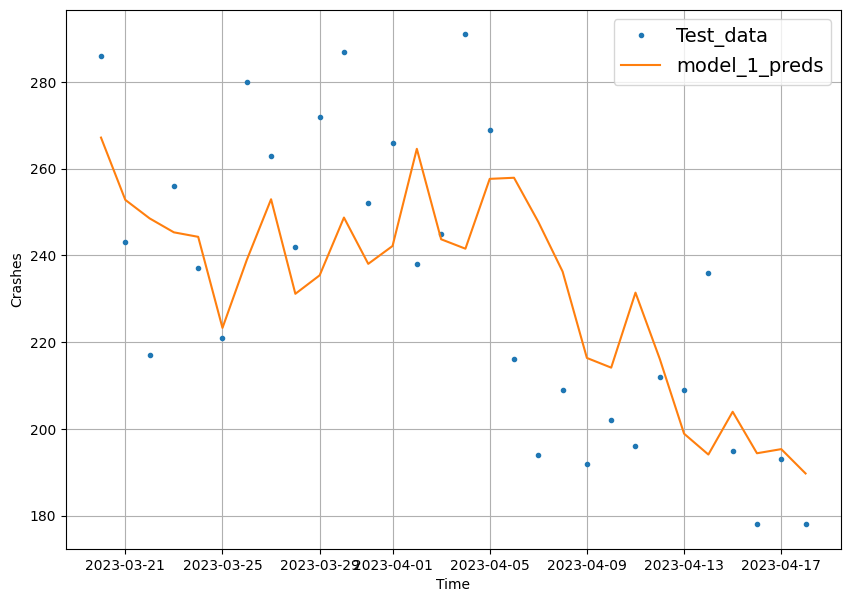

In [ ]:
offset = 5
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(
    timesteps=X_test[-len(test_windows) :],
    values=test_labels[:, 0],
    start=offset,
    label="Test_data",
)
plot_time_series(
    timesteps=X_test[-len(test_windows) :],
    values=model_1_preds,
    start=offset,
    format="-",
    label="model_1_preds",
)


In [ ]:
# LSTM


In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(
    inputs
)  # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_2.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=0,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)],
)


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_2.evaluate(test_windows, test_labels)


2/2 [==============================] - 0s 7ms/step - loss: 19.4289


19.42886734008789

In [ ]:
# Make predictions with our LSTM model
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]


2/2 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([257.81183, 255.418  , 257.5264 , 247.31332, 245.27023, 245.73485,
       255.98364, 246.98207, 233.13345, 241.20773], dtype=float32)>

In [ ]:
# Evaluate model_2_results preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results


{'mae': 19.42887,
 'mse': 598.1803,
 'rmse': 24.457726,
 'mape': 8.162933,
 'mase': 0.7845387}

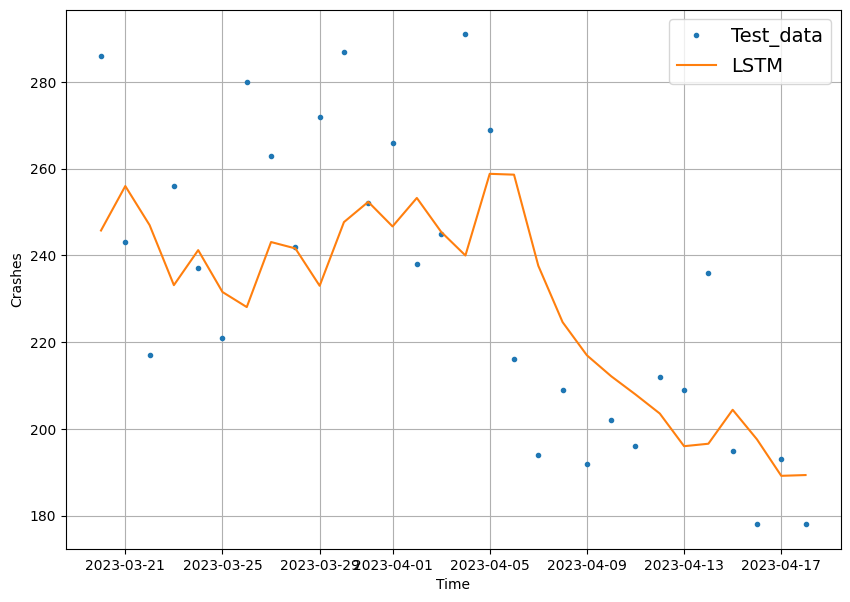

In [ ]:
offset = 5
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(
    timesteps=X_test[-len(test_windows) :],
    values=test_labels[:, 0],
    start=offset,
    label="Test_data",
)
plot_time_series(
    timesteps=X_test[-len(test_windows) :],
    values=model_2_preds,
    start=offset,
    format="-",
    label="LSTM",
)


In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results


{'mae': 24.37143,
 'mse': 777.0,
 'rmse': 27.87472,
 'mape': 10.265176,
 'mase': 0.9841195}

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame(
    {
        "naive_model": naive_results,
        "dense_neural_net": model_1_results,
        "lstm": model_2_results,
    }
).T
model_results.head(10)


,mae,mse,rmse,mape,mase
naive_model,24.371429,777.000000,27.874720,10.265176,0.984119
dense_neural_net,21.079981,658.155151,25.654535,8.956350,0.851211
lstm,19.428869,598.180298,24.457726,8.162933,0.784539


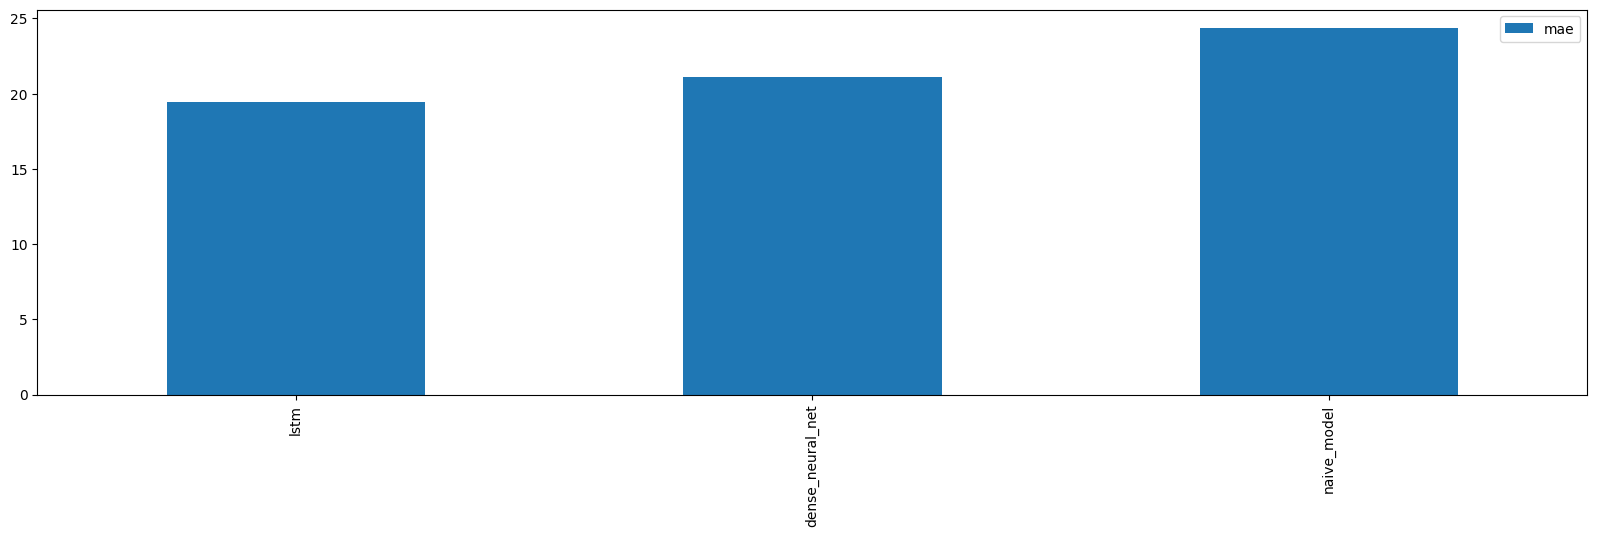

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(20, 5), kind="bar")
